      global_id  NumOfVisitors    Category  \
0     477012200        30800.0  Библиотека   
1     477012201        45840.0  Библиотека   
2     477012220        25672.0  Библиотека   
3     477012221        30494.0  Библиотека   
4     477012222         9216.0  Библиотека   
..          ...            ...         ...   
262   926371463        25398.0  Библиотека   
263   969606877        39858.0  Библиотека   
264  1006076450        10430.0  Библиотека   
265  1006299121        46017.0  Библиотека   
266  1015659743        75751.0  Библиотека   

                                   CommonName  \
0                              Библиотека №56   
1                             Библиотека №140   
2              Библиотека №166 имени 1-го Мая   
3                  Библиотека №169 «Проспект»   
4       Библиотека №266 имени К.И. Чуковского   
..                                        ...   
262                            Библиотека №49   
263  Библиотека №164 «Просвещение трудящихся»   
264   

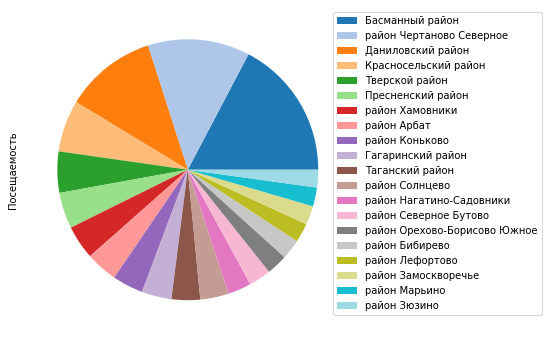

In [10]:
'''
Задание 13. Сборка PDF документа
Используя данные по посещаемости библиотек в районах Москвы
https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json
постройте круговую диаграмму суммарной посещаемости (NumOfVisitors) 20 наиболее популярных районов Москвы.
Создайте PDF отчёт, используя файл https://video.ittensive.com/python-advanced/title.pdf как первую страницу. 
На второй странице выведите итоговую диаграмму, самый популярный район Москвы и число посетителей библиотек в нём.
Сколько посетителей библиотек в районе Москвы с самой большой суммарной посещаемостью библиотек?
'''

from reportlab.pdfgen import canvas # Импортирование объекта Canvas из библиотеки Reportlab 
from reportlab.lib import pagesizes # Импортирование объекта Pagesizes из библиотеки Reportlab 
from reportlab.pdfbase import pdfmetrics # Импортирование объекта Pdfmetrics из библиотеки Reportlab 
from reportlab.pdfbase.ttfonts import TTFont # Импортирование объекта TTFont из библиотеки Reportlab 
from reportlab.lib.utils import ImageReader # Импортирование объекта ImageReader из библиотеки Reportlab 
from PyPDF2 import PdfMerger, PdfReader # Импортирование объектов PdfFileMerger, Pd fFileReader из библиотеки PyPDF2 
import requests # Импортирование библиотеки Requests
import json # Импортирование библиотеки Json
import pandas as pd # Импортирование библиотеки Pandas
import matplotlib.pyplot as plt # Импортирование библиотеки Matplotlib
import seaborn as sns # Импортирование библиотеки Seaborn
%matplotlib inline 
# Отображение графика в этом же окне

def extract_district (x): # Функция для извлечения названия района:
    return list(map(lambda a: a["District"], x))[0] # возвращение первого значения из списка

r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json") # Загрузка данных JSON
data = pd.DataFrame(json.loads(r.content)).fillna(value=0) # Передача данных в датафрейм, заполнение отсутствующих значений 0
print (data) # Вывод данных Pandas из переменной data
print ("----------------------------------------------------------------------------------------------------------------")
# Вывод разделяющей строки для лучшего восприятия данных
data["District"] = data["ObjectAddress"].apply(extract_district) # Применение функции "extract_district" к столбцу "ObjectAddress" 
data_sum = data[["District", "NumOfVisitors", "NumOfSeats", "NumOfReaders"]].groupby("District").sum().sort_values("NumOfVisitors", ascending=False) 
# Группировка по району и сортировка по посетителям
fig = plt.figure(figsize=(11,6)) # Построение круговой диаграммы, установка её размера
area = fig.add_subplot(1, 1, 1) # Добавление подобласти
data_sum[0:20]["NumOfVisitors"].plot.pie(ax = area, # Построение результирующей диаграммы из 20-ти самых популярных районов
                                        labels=[""]*20, # создание пустых значений по количеству районов
                                        label="Посещаемость", # установка подписи диаграммы
                                        cmap="tab20") # установка цветовой схемы 
plt.legend(data_sum[0:20].index, # Перенос значений в легенду
          bbox_to_anchor=(1.5,1,0.1,0)) # вывод легенды справа от диаграммы
plt.savefig("C:\\Users\\Roman\\Downloads\\readers.png") # Сохранение графика в файл для вставки в отчёт

PDF = canvas.Canvas("C:\\Users\\Roman\\Downloads\\readers.pdf", pagesize=pagesizes.A4) # Создание холста с размерами
pdfmetrics.registerFont(TTFont("Trebuchet", "C:\\Users\\Roman\\Downloads\\Trebuchet.ttf")) # Создание шрифта
PDF.setFont("Trebuchet", 48) # Установка размера шрифта
PDF.drawString(70, 650, "Посетители библиотек") # Нанесение данных по читателям библиотек 
PDF.drawString(80, 590, "по районам Москвы") # Нанесение данных по читателям библиотек 
PDF.setFont("Trebuchet", 13)  # Установка размера шрифта
PDF.drawString(550, 820, "2") # Нанесение данных по читателям библиотек 
PDF.drawImage(ImageReader("C:\\Users\\Roman\\Downloads\\readers.png"), -200, 150) # Вставка круговой диаграммы через отдельное изображение
PDF.setFont("Trebuchet", 20) # Установка размера шрифта
PDF.drawString(100, 150, "Самый популярный район") # Нанесение данных по читателям библиотек 
PDF.setFont("Trebuchet", 24) # Установка размера шрифта
PDF.drawString(100, 120, data_sum.index[0]) # Информация по самому популярному району, первый район в отсортированном списке 
PDF.setFont("Trebuchet", 20) # Установка размера шрифта
PDF.drawString(100, 90,
               "Посетителей: " + str(int(data_sum["NumOfVisitors"].values[0]))) # Информация по самому популярному району, первый район в отсортированном списке
PDF.save() # Сохранение Pdf-документа
files = ["C:\\Users\\Roman\\Downloads\\title.pdf", "C:\\Users\\Roman\\Downloads\\readers.pdf"] 
# Объединение титульного листа и сгенерированный отчёт
merger = PdfMerger() # Объединение сгенерированного отчёта и титульной страницы через PdfFileManager
for filename in files: 
    merger.append(PdfReader(open(filename, "rb"))) # открытие файла на чтение
merger.write("C:\\Users\\Roman\\Downloads\\Report.pdf") # Запись информации в файл

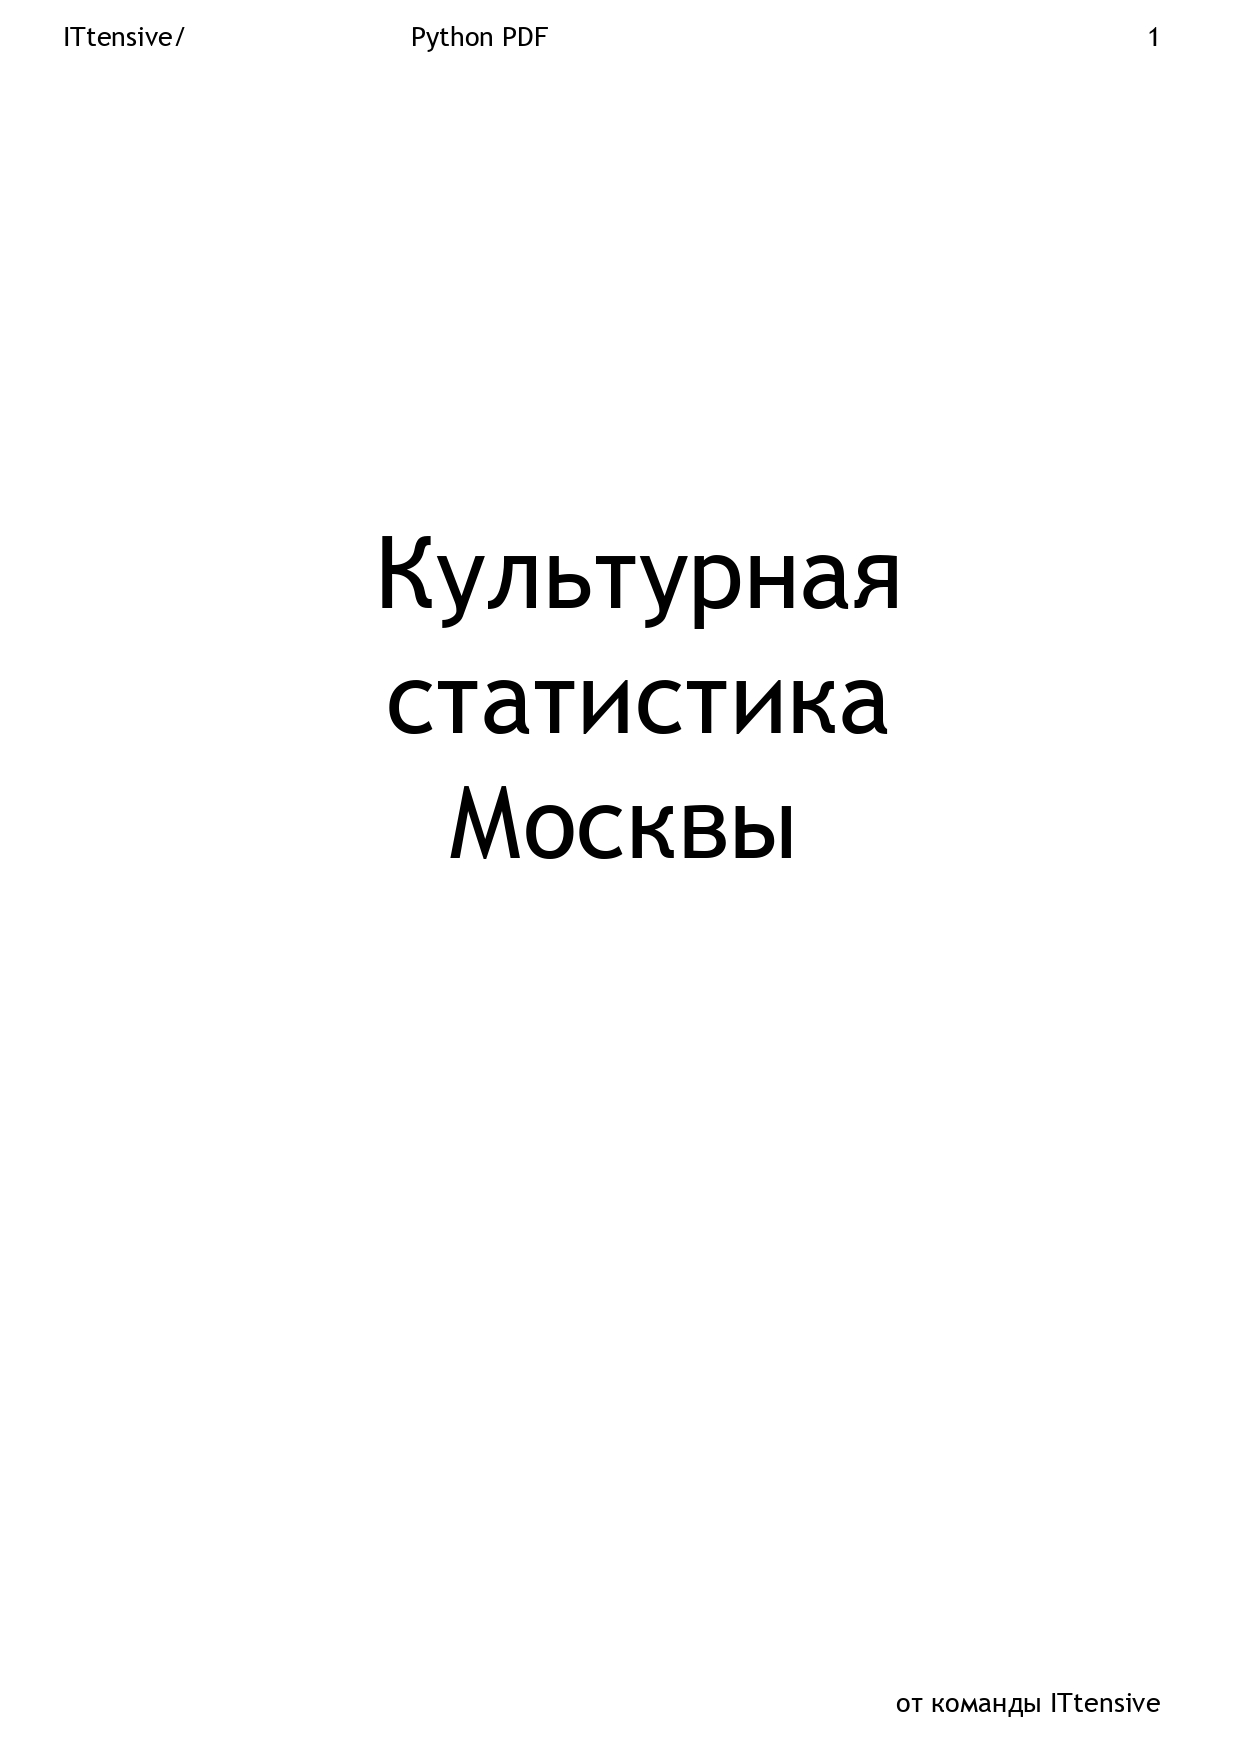

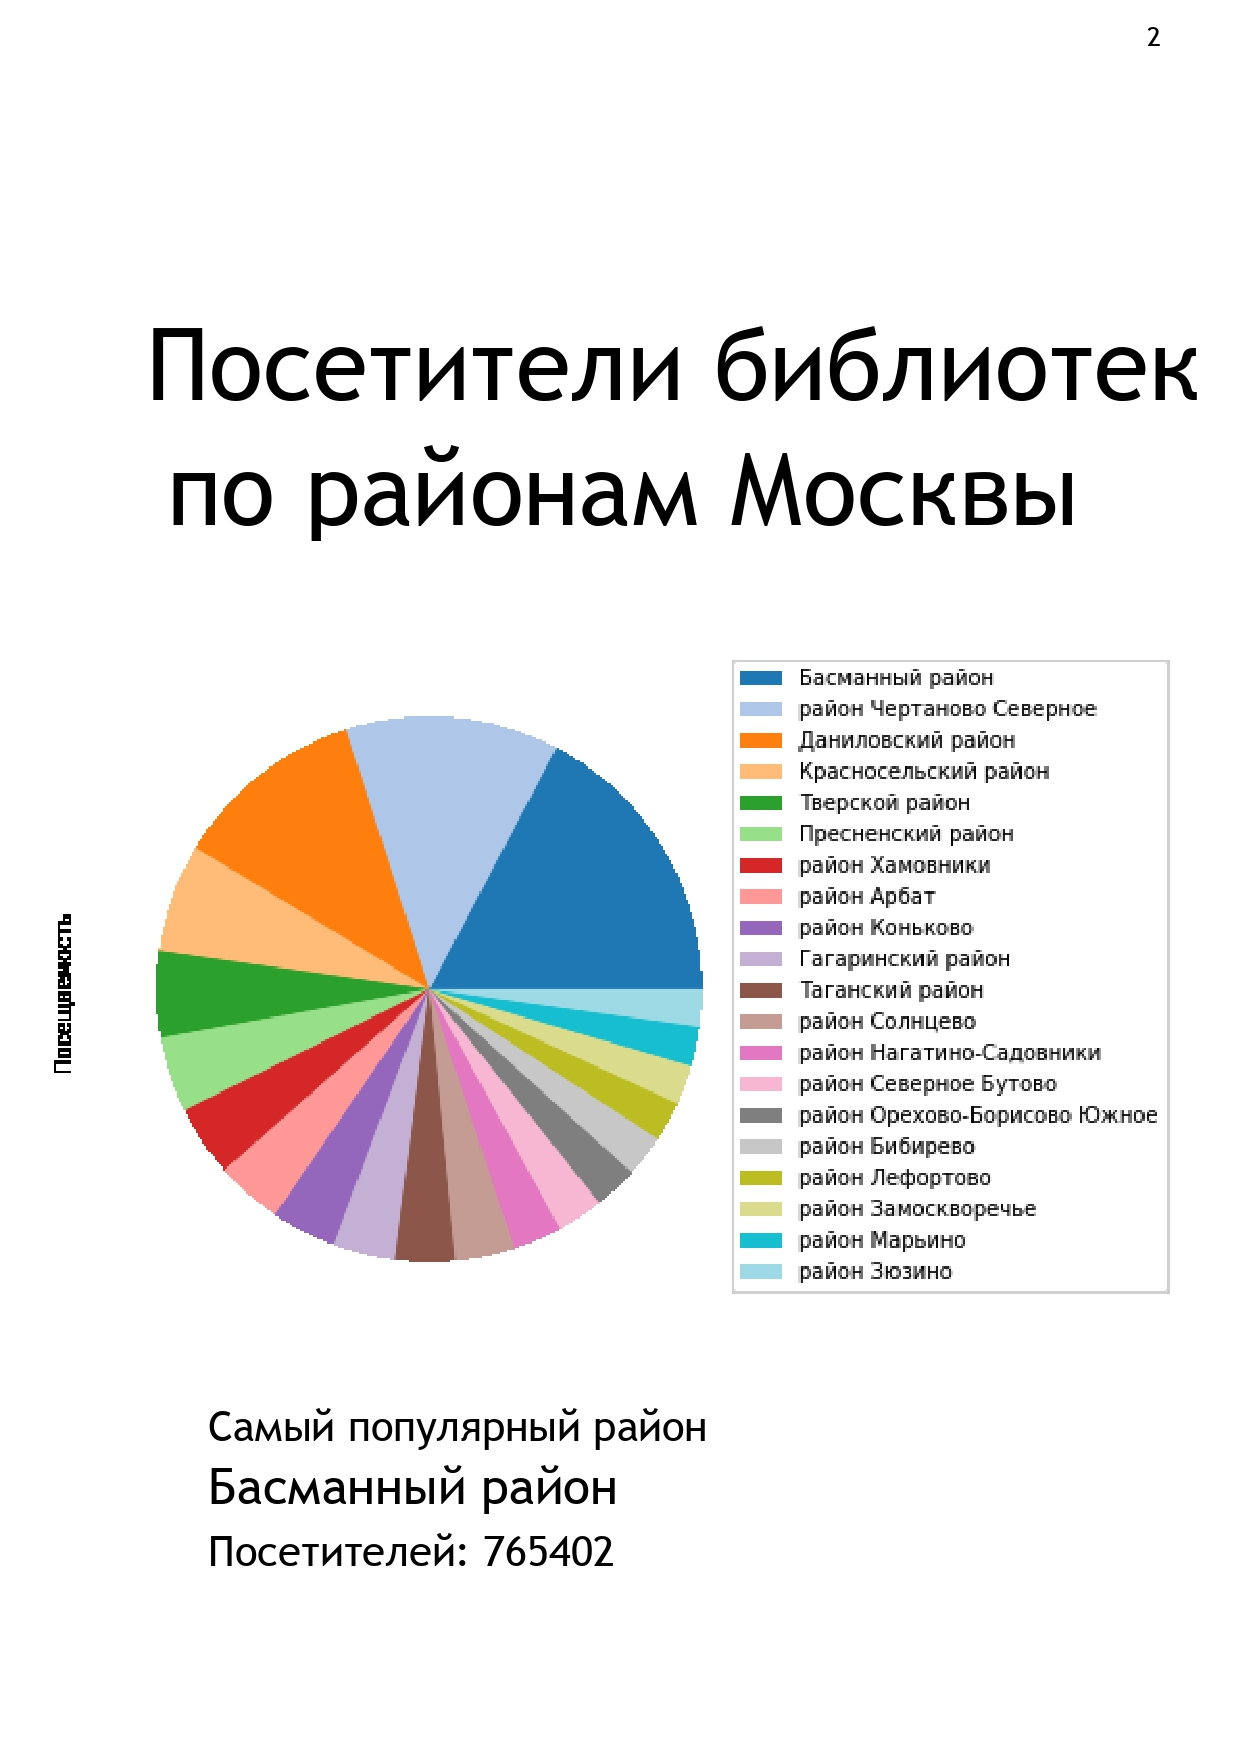